In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [56]:
# Importing dataset
dataset = pd.read_csv('train.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [57]:
dataset.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


# EDA

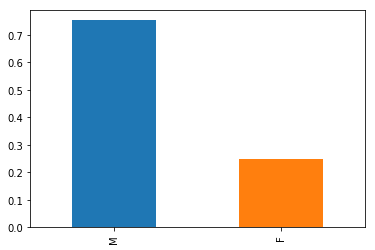

In [58]:
dataset['Gender'].value_counts(normalize = True).plot(kind = "bar")

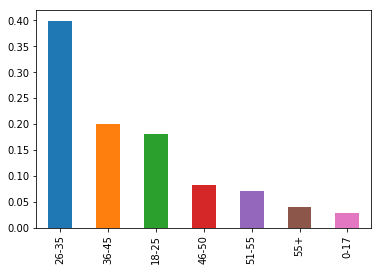

In [59]:
dataset['Age'].value_counts(normalize = True).plot(kind = "bar")

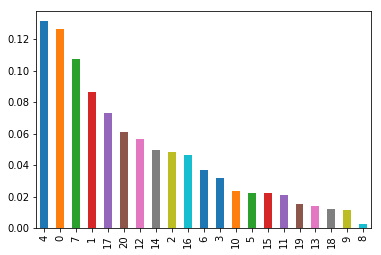

In [60]:
dataset['Occupation'].value_counts(normalize = True).plot(kind = "bar")

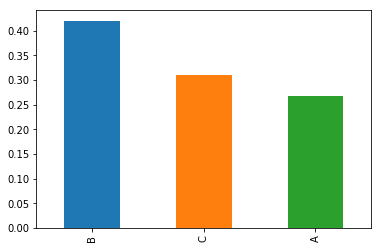

In [61]:
dataset['City_Category'].value_counts(normalize = True).plot(kind = "bar")

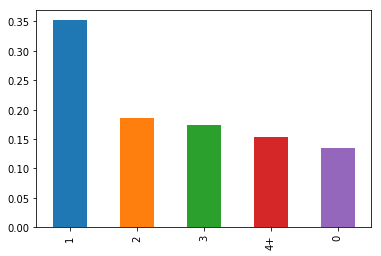

In [62]:
dataset['Stay_In_Current_City_Years'].value_counts(normalize = True).plot(kind = "bar")

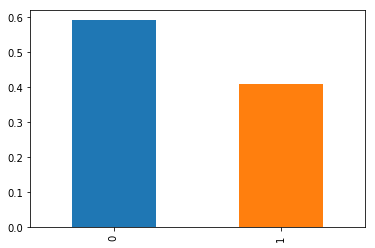

In [63]:
dataset['Marital_Status'].value_counts(normalize = True).plot(kind = "bar")

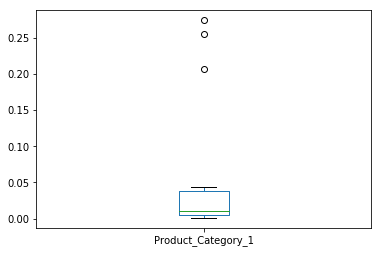

In [64]:
dataset['Product_Category_1'].value_counts(normalize = True).plot(kind = "box")

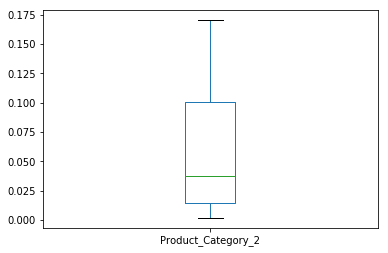

In [65]:
dataset['Product_Category_2'].value_counts(normalize = True).plot(kind = "box")

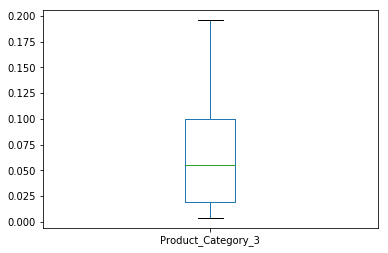

In [66]:
dataset['Product_Category_3'].value_counts(normalize = True).plot(kind = "box")

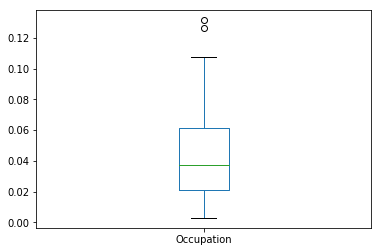

In [67]:
dataset['Occupation'].value_counts(normalize = True).plot(kind = "box")

# Pre Processing

In [68]:
# Dropping unnecessary columns
dataset.pop('User_ID')
dataset.pop('Product_ID')

# One hot encoding categorical variables
dataset['Gender'] = dataset['Gender'].map({'M':1,'F':0})

city = pd.get_dummies(dataset['City_Category'],drop_first=True)
dataset.pop('City_Category')
dataset = pd.concat([city,dataset],axis = 1)

age = pd.get_dummies(dataset['Age'],drop_first=True)
dataset.pop('Age')
dataset = pd.concat([age,dataset],axis = 1)

stay = pd.get_dummies(dataset['Stay_In_Current_City_Years'],drop_first=True)
dataset.pop('Stay_In_Current_City_Years')
dataset = pd.concat([stay,dataset],axis = 1)

dataset['Product_Category_2'].fillna(dataset['Product_Category_2'].median(),inplace = True)
dataset['Product_Category_3'].fillna(dataset['Product_Category_3'].median(),inplace = True)

dataset['Occupation'] = np.log(dataset['Occupation']*10+1)
dataset['Product_Category_1'] = np.log(dataset['Product_Category_1']*10+1)
dataset['Product_Category_2'] = np.log(dataset['Product_Category_2']*10+1)
dataset['Product_Category_3'] = np.log(dataset['Product_Category_3']*10+1)

In [69]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 19 columns):
1                     550068 non-null uint8
2                     550068 non-null uint8
3                     550068 non-null uint8
4+                    550068 non-null uint8
18-25                 550068 non-null uint8
26-35                 550068 non-null uint8
36-45                 550068 non-null uint8
46-50                 550068 non-null uint8
51-55                 550068 non-null uint8
55+                   550068 non-null uint8
B                     550068 non-null uint8
C                     550068 non-null uint8
Gender                550068 non-null int64
Occupation            550068 non-null float64
Marital_Status        550068 non-null int64
Product_Category_1    550068 non-null float64
Product_Category_2    550068 non-null float64
Product_Category_3    550068 non-null float64
Purchase              550068 non-null int64
dtypes: float64(4), int64(3), uint8(12)
memor

In [70]:
# Correlation Matrix
dataset.corr()

,1,2,3,4+,18-25,26-35,36-45,46-50,51-55,55+,B,C,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1.000000,-0.351584,-0.337625,-0.314736,-0.027666,0.000744,-0.016079,0.024941,0.050712,-0.008210,0.015090,0.006478,-0.030400,0.000499,0.028831,0.006747,0.005425,0.002119,-0.002030
2,-0.351584,1.000000,-0.218180,-0.203389,0.009724,-0.007643,0.008057,-0.009156,-0.018785,0.002918,-0.009736,0.012750,0.008806,-0.003853,-0.006474,-0.008132,-0.006054,-0.005119,0.005358
3,-0.337625,-0.218180,1.000000,-0.195314,-0.023329,0.014127,0.047259,-0.033426,-0.030997,-0.002157,0.025754,-0.019316,-0.011080,0.021022,-0.013635,-0.010525,-0.006229,-0.001582,0.002090
4+,-0.314736,-0.203389,-0.195314,1.000000,0.010036,0.012900,-0.024780,0.002550,0.001930,0.009946,-0.010174,0.015569,0.027125,0.005991,-0.006782,0.005805,0.004551,0.004075,0.000988
18-25,-0.027666,0.009724,-0.023329,0.010036,1.000000,-0.383431,-0.235194,-0.141595,-0.129045,-0.094879,0.013039,-0.021766,-0.000246,-0.005545,-0.189174,-0.030946,-0.029701,-0.021295,-0.008831
26-35,0.000744,-0.007643,0.014127,0.012900,-0.383431,1.000000,-0.407567,-0.245369,-0.223622,-0.164415,-0.005266,-0.112852,0.029811,-0.062841,-0.027654,-0.018047,-0.003413,-0.003104,-0.001830
36-45,-0.016079,0.008057,0.047259,-0.024780,-0.235194,-0.407567,1.000000,-0.150507,-0.137168,-0.100851,0.012556,0.015345,-0.000088,0.034966,-0.013227,0.008681,0.008384,0.005860,0.006707
46-50,0.024941,-0.009156,-0.033426,0.002550,-0.141595,-0.245369,-0.150507,1.000000,-0.082580,-0.060716,0.016007,0.049315,-0.029262,0.015519,0.191389,0.024289,0.016526,0.012564,-0.003317
51-55,0.050712,-0.018785,-0.030997,0.001930,-0.129045,-0.223622,-0.137168,-0.082580,1.000000,-0.055334,0.022526,0.041245,-0.006416,0.016216,0.172278,0.021902,0.018855,0.017204,0.014792
55+,-0.008210,0.002918,-0.002157,0.009946,-0.094879,-0.164415,-0.100851,-0.060716,-0.055334,1.000000,-0.073642,0.123121,0.004921,0.034433,0.091778,0.033057,0.020884,0.015488,0.002904


In [71]:
dataset.columns

Index(['1', '2', '3', '4+', '18-25', '26-35', '36-45', '46-50', '51-55', '55+',
       'B', 'C', 'Gender', 'Occupation', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Purchase'],
      dtype='object')

In [72]:
X = dataset[['1', '2', '3', '4+', '18-25', '26-35', '36-45', '46-50', '51-55', '55+',
       'B', 'C', 'Gender', 'Occupation', 'Marital_Status',
       'Product_Category_1','Product_Category_2', 'Product_Category_3']]

y = dataset['Purchase']

In [73]:
# Splitting data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [74]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 4416.362293209475


In [75]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()

regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 3334.074477678253


In [76]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()

regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 3000.3954844760847


In [77]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50)

regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 3064.399908845026


# Backward Elimination

In [79]:
import statsmodels.api as sm
X = sm.add_constant(X)
X_opt = X[['1', '2', '3', '4+', '18-25', '26-35', '36-45', '46-50', '51-55', '55+',
           'B', 'C', 'Gender', 'Occupation', 'Marital_Status',
           'Product_Category_1','Product_Category_2', 'Product_Category_3']]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                 1.363e+05
Date:                Thu, 28 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:56:38   Log-Likelihood:            -5.4087e+06
No. Observations:              550068   AIC:                         1.082e+07
Df Residuals:                  550050   BIC:                         1.082e+07
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
1                    299.8755     19.416     15.444      0.000     261.820     337.931
2                    338.8261     21.678     15.630      0.000     296.337     381.315
3                    284.0970     22.055     12.881      0.000     240.870     327.324
4+                   304.3736     22.624     13.454      0.000     260.032     348.715
18-25               1742.5611     38.319     45.475      0.000    1667.457    1817.665
26-35               1940.8299     37.234     52.126      0.000    1867.853    2013.807
36-45               2018.7849     38.411     52.557      0.000    1943.500    2094.070
46-50               2010.9359     42.433     47.391      0.000    1927.769    2094.103
51-55               2297.4343     43.474     52.846      0.000    2212.227    2382.642
55+                 2154.5587     47.864     45.014      0.000    2060.747    2248.371
B                    289.1158     15.082     19.169      0.000     259.555     318.677
C                    805.1734     16.257     49.528      0.000     773.311     837.036
Gender               397.8230     14.197     28.022      0.000     369.998     425.648
Occupation            86.2069      3.737     23.066      0.000      78.882      93.532
Marital_Status       -55.5144     13.170     -4.215      0.000     -81.327     -29.702
Product_Category_1 -2655.4590      8.037   -330.385      0.000   -2671.212   -2639.706
Product_Category_2  -268.6109     13.302    -20.194      0.000    -294.682    -242.540
Product_Category_3  3489.9754     14.179    246.145      0.000    3462.186    3517.765
==============================================================================
Omnibus:                    66525.166   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           102068.923
Skew:                           0.880   Prob(JB):                         0.00
Kurtosis:                       4.165   Cond. No.                         129.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
X_opt = X[['18-25', '26-35', '36-45', '46-50', '51-55', '55+',
           'B', 'C', 'Gender', 'Occupation', 'Marital_Status',
           'Product_Category_1','Product_Category_2', 'Product_Category_3']]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                 1.752e+05
Date:                Thu, 28 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:56:40   Log-Likelihood:            -5.4089e+06
No. Observations:              550068   AIC:                         1.082e+07
Df Residuals:                  550054   BIC:                         1.082e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
18-25               1756.8080     38.307     45.861      0.000    1681.727    1831.889
26-35               1966.9345     37.195     52.882      0.000    1894.034    2039.835
36-45               2042.4699     38.386     53.209      0.000    1967.235    2117.704
46-50               2027.5911     42.408     47.811      0.000    1944.472    2110.710
51-55               2323.0441     43.420     53.502      0.000    2237.943    2408.145
55+                 2173.8718     47.850     45.431      0.000    2080.086    2267.657
B                    303.1960     15.060     20.132      0.000     273.678     332.714
C                    820.4015     16.237     50.527      0.000     788.577     852.226
Gender               395.4552     14.190     27.868      0.000     367.643     423.267
Occupation            88.5471      3.735     23.708      0.000      81.227      95.867
Marital_Status       -54.8417     13.172     -4.163      0.000     -80.659     -29.025
Product_Category_1 -2655.8348      8.039   -330.361      0.000   -2671.591   -2640.078
Product_Category_2  -270.9945     13.305    -20.369      0.000    -297.071    -244.918
Product_Category_3  3538.2624     13.904    254.469      0.000    3511.010    3565.515
==============================================================================
Omnibus:                    66454.161   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           101825.406
Skew:                           0.880   Prob(JB):                         0.00
Kurtosis:                       4.161   Cond. No.                         128.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
X_opt = X[['B', 'C', 'Gender', 'Occupation', 'Marital_Status',
           'Product_Category_1','Product_Category_2', 'Product_Category_3']]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                 3.043e+05
Date:                Thu, 28 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:56:40   Log-Likelihood:            -5.4105e+06
No. Observations:              550068   AIC:                         1.082e+07
Df Residuals:                  550060   BIC:                         1.082e+07
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
B                    318.6569     15.032     21.198      0.000     289.194     348.120
C                    816.7212     16.045     50.902      0.000     785.273     848.169
Gender               437.2159     14.200     30.789      0.000     409.384     465.048
Occupation            91.3929      3.738     24.450      0.000      84.067      98.719
Marital_Status       117.3568     12.414      9.454      0.000      93.026     141.687
Product_Category_1 -2649.2851      8.057   -328.838      0.000   -2665.076   -2633.495
Product_Category_2  -275.1641     13.342    -20.624      0.000    -301.314    -249.014
Product_Category_3  3905.9698     11.965    326.460      0.000    3882.519    3929.420
==============================================================================
Omnibus:                    65433.122   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            99196.480
Skew:                           0.874   Prob(JB):                         0.00
Kurtosis:                       4.128   Cond. No.                         27.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
X_opt = X[['B', 'C', 'Gender', 'Occupation', 'Marital_Status', 'Product_Category_1']]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                 2.421e+05
Date:                Thu, 28 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:56:40   Log-Likelihood:            -5.5203e+06
No. Observations:              550068   AIC:                         1.104e+07
Df Residuals:                  550062   BIC:                         1.104e+07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
B                   2397.6228     17.689    135.541      0.000    2362.952    2432.293
C                   2874.5682     18.981    151.442      0.000    2837.365    2911.771
Gender              2905.3153     16.336    177.849      0.000    2873.298    2937.333
Occupation           804.9666      4.244    189.677      0.000     796.649     813.284
Marital_Status       924.9352     15.035     61.517      0.000     895.466     954.404
Product_Category_1   334.8130      5.281     63.404      0.000     324.463     345.163
==============================================================================
Omnibus:                    19444.241   Durbin-Watson:                   1.450
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20412.643
Skew:                           0.450   Prob(JB):                         0.00
Kurtosis:                       2.719   Cond. No.                         16.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
X_opt = X[['Gender', 'Occupation', 'Marital_Status',
           'Product_Category_1','Product_Category_2', 'Product_Category_3']]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                 4.033e+05
Date:                Thu, 28 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:56:41   Log-Likelihood:            -5.4119e+06
No. Observations:              550068   AIC:                         1.082e+07
Df Residuals:                  550062   BIC:                         1.082e+07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Gender               435.3862     14.235     30.586      0.000     407.487     463.286
Occupation            98.6015      3.744     26.333      0.000      91.262     105.941
Marital_Status       144.3244     12.433     11.608      0.000     119.957     168.692
Product_Category_1 -2658.2449      8.074   -329.228      0.000   -2674.070   -2642.420
Product_Category_2  -280.4221     13.374    -20.968      0.000    -306.634    -254.210
Product_Category_3  3989.1197     11.795    338.214      0.000    3966.003    4012.237
==============================================================================
Omnibus:                    65056.638   Durbin-Watson:                   1.720
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            98155.348
Skew:                           0.873   Prob(JB):                         0.00
Kurtosis:                       4.112   Cond. No.                         24.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
X_opt = X[['Gender', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                 6.039e+05
Date:                Thu, 28 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:56:41   Log-Likelihood:            -5.4123e+06
No. Observations:              550068   AIC:                         1.082e+07
Df Residuals:                  550064   BIC:                         1.082e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Gender               467.0575     14.190     32.915      0.000     439.246     494.869
Product_Category_1 -2658.6370      8.079   -329.068      0.000   -2674.472   -2642.802
Product_Category_2  -283.7145     13.383    -21.199      0.000    -309.945    -257.484
Product_Category_3  4073.8001     11.428    356.468      0.000    4051.401    4096.199
==============================================================================
Omnibus:                    65010.690   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            97953.958
Skew:                           0.873   Prob(JB):                         0.00
Kurtosis:                       4.107   Cond. No.                         21.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
# Splitting data into train and test set
from sklearn.model_selection import train_test_split
xb_train, xb_test, yb_train, yb_test = train_test_split(X_opt, y, test_size = 0.2, random_state = 42)

from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()

regressor.fit(xb_train, yb_train)
y_pred = regressor.predict(xb_test)

from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(yb_test, y_pred)))

RMSE : 3005.5170320127527


# Thank You